# Linear regression analysis

Based on a large number of data observations, the use of mathematical statistics to establish a regression relationship function (also called regression equation) between the dependent variable and the independent variable belongs to the category of regression analysis.

The mathematical connotation of regression is discussed with a linear equation of one variable: if there are existing k observation data pairs $(x_i+y_i)$, find a linear equation in one variable, and hope that the equation coincides with the observation data as much as possible

Suppose the fitting equation is:$y = a*x + b$，Substitute x in the observed data to get $y_1 = a*x + b$, and the error with y in the observed data is $error = y - y_1 = y - (a*x + b)$

Let the objective function be:
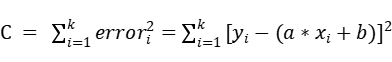

In order to make the error smaller, that is, when C takes a minimum value, the partial derivatives of a and b are 0:
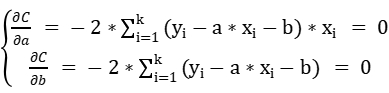

Solutions have to:
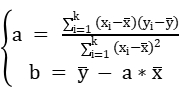

From this, the regression equation can be obtained: $y = a*x + b

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()

[Boston house price](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices) data was collected by Carnegie Mellon University, the StatLib library, 1978, covering housing data for 506 different suburbs in Boston, Massachusetts.
A total of 506 pieces of data are included. Each piece of data has 14 fields, including 13 attributes, and an average price of house prices.

In [2]:
boston.data.shape

(506, 13)

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

|  feature names   | mean |
| :-----| :----: |
| crim  | crime rate per capita |
| zn  | Residential land > 25,000 feet scale |
| indus  | Proportion of non-retail commercial land |
| chas  | Charles River null variable (region boundary is river, value is 1, otherwise 0) |
| nox  | Nitric oxide concentration |
| rm  | Average number of rooms per dwelling |
| age  | Proportion of self-occupied houses built after 1940 |
| dis  | Distance from central Boston |
| rad  | Proximity index to major highways |
| tax  | property tax rate |
| ptratio  | teacher-student ratio |	
| b  | color people ratio |	
| lstat  | low-status population |	
| medv  | Average owner-occupancy price, in thousands of dollars |	
	

In [4]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Add a "Price" (target) column to the data

In [5]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


1. View descriptive data statistics:  We can see the mean, median, standard deviation, etc. of each field.

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


2. Check the correlation of each field: you can see that the house price has a relatively strong positive correlation with the number of rooms in a house, and a relatively strong negative correlation with the proportion of low-income people.

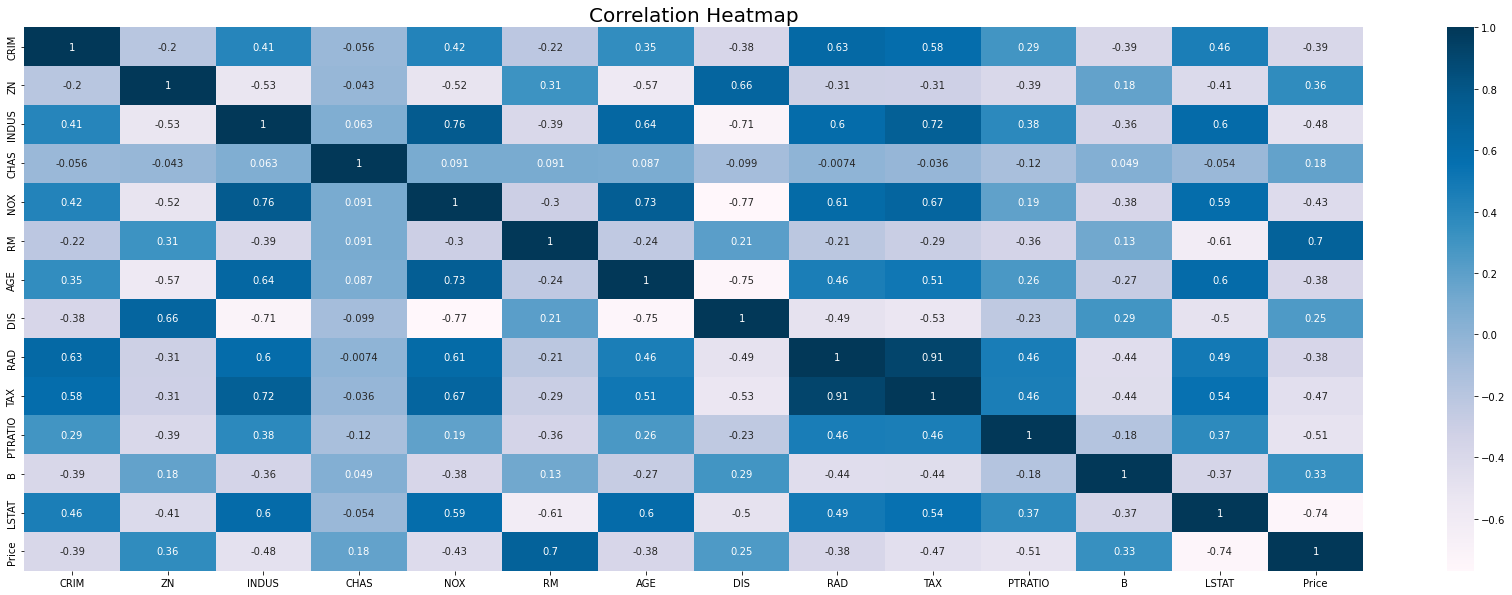

In [7]:
corrboston = data.corr()
plt.figure(figsize=(30,10)) 
sns.heatmap(corrboston,annot=True,cmap='PuBu')
plt.title("Correlation Heatmap",fontsize=20)
plt.show()

3. Check the impact of crossing the Charles River on housing prices: It can be seen that the luxury houses that are crossed by the river account for only 6.92%, and the luxury houses that are crossed by the Charles River are on average 28.7% more expensive than those that are not crossed.

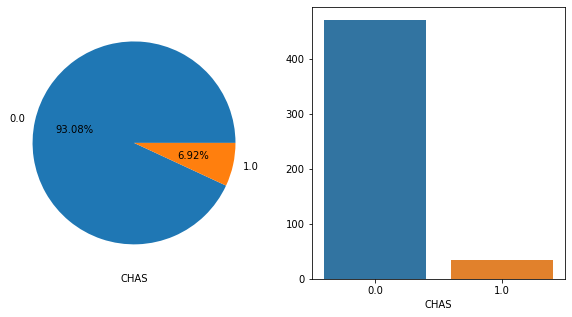

In [8]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

data['CHAS'].value_counts().plot.pie(ax=ax[0],shadow=False,autopct='%1.2f%%')
ax[0].set_ylabel('')    
ax[0].set_xlabel('CHAS')   

sns.countplot(x = 'CHAS',data=data,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('CHAS')
plt.show()

4. Scatter plot of each field and price: to get an initial understanding of the relationship between price and the corresponding field

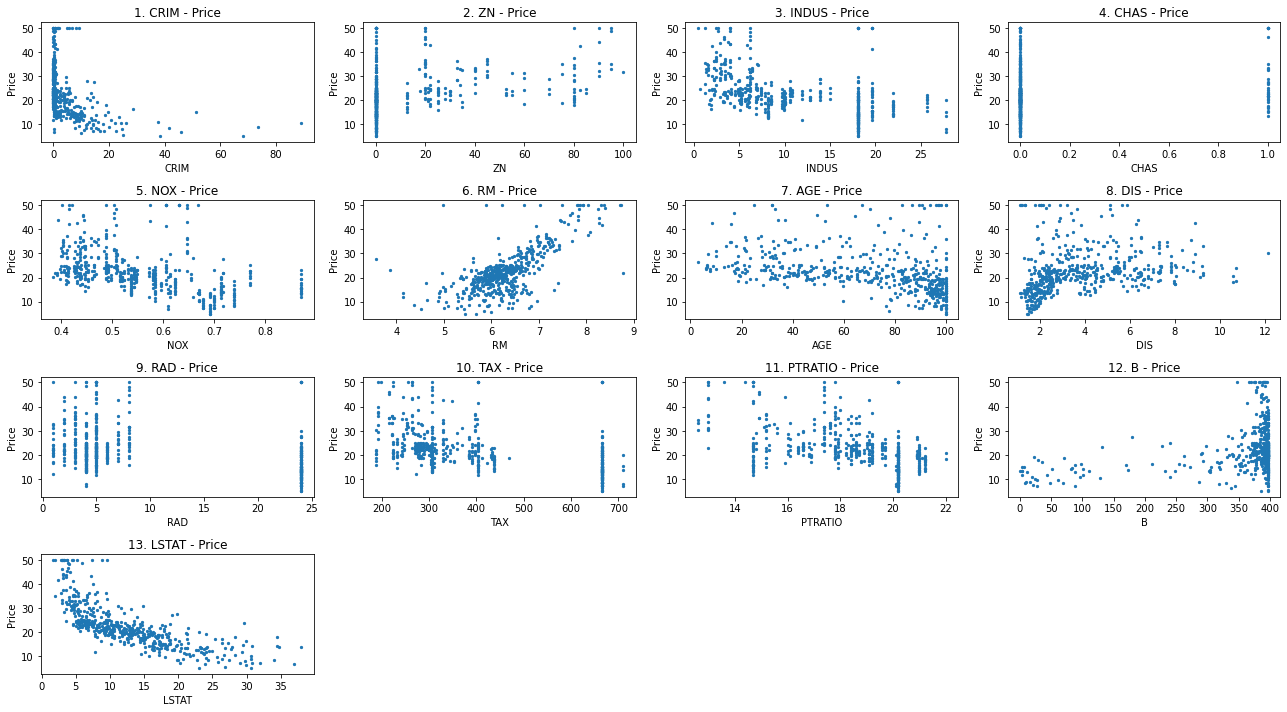

In [9]:
x_data = data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']] 
y_data = data[['Price']] 

plt.figure(figsize=(18,10))

for i in range(13):
    plt.subplot(4,4,i+1)
    plt.scatter(x_data.values[:,i],y_data,s = 5)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel('Price')
    plt.title(str(i+1)+'. '+boston.feature_names[i]+' - Price')  
    
plt.tight_layout()
plt.show()

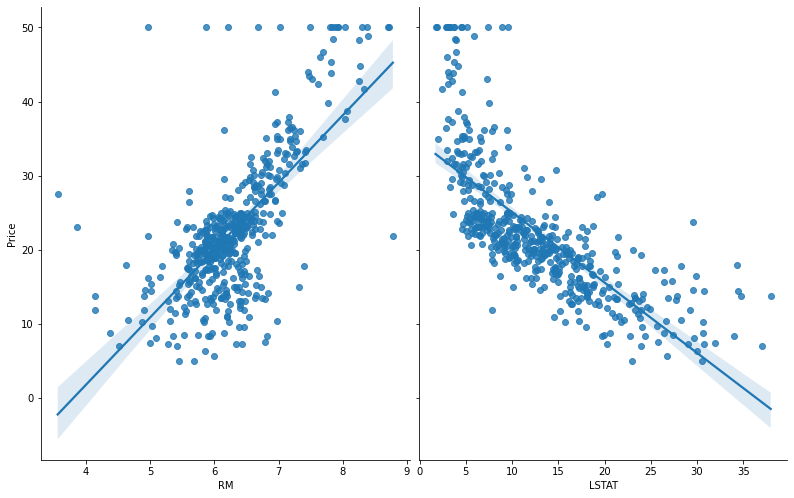

In [10]:
sns.pairplot(data,x_vars=['RM','LSTAT'],y_vars='Price',height=7,aspect=0.8,kind='reg')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
bostonrm = pd.DataFrame()
modelrm = LinearRegression()
modelrm.fit(data['RM'].values.reshape(-1,1),data['Price'].values.reshape(-1,1))
print("coefficient：",modelrm.coef_)
print("intercept：",modelrm.intercept_)
print("Linear regression equation between room number and house price：")
print('y = %+.4f*x% + .4f'%(modelrm.coef_[0][0],modelrm.intercept_[0]))


coefficient： [[9.10210898]]
intercept： [-34.67062078]
Linear regression equation between room number and house price：
y = +9.1021*x-34.6706


In [12]:
bostonrm = pd.DataFrame()
modelrm = LinearRegression()
modelrm.fit(data['LSTAT'].values.reshape(-1,1),data['Price'].values.reshape(-1,1))
print("coefficient：",modelrm.coef_)
print("intercept：",modelrm.intercept_)
print("Linear regression equation between low income poputation and house price：")
print('y = %+.4f*x% + .4f'%(modelrm.coef_[0][0],modelrm.intercept_[0]))


coefficient： [[-0.95004935]]
intercept： [34.55384088]
Linear regression equation between low income poputation and house price：
y = -0.9500*x+34.5538


* Univariate regression equation with rm as independent variable:$medv = 9.1021 * (rm) - 34.6706$

* Univariate regression equation with lstat as independent variable: $medv = -0.9500 * (lstat) + 34.5538$

Further, the multiple regression equation can be calculated with rm and lstat as independent variables

In [13]:
modelmulti = LinearRegression()
modelmulti.fit(data[['LSTAT','RM']].values,data['Price'].values.reshape(-1,1))
print("coefficient：",modelmulti.coef_)
print("intercept：",modelmulti.intercept_)
print('y = %+.4f*(lstat)%+.4f*(rm)% +.4f'%(modelmulti.coef_[0][0],modelmulti.coef_[0][1],modelmulti.intercept_[0]))


coefficient： [[-0.64235833  5.09478798]]
intercept： [-1.35827281]
y = -0.6424*(lstat)+5.0948*(rm)-1.3583


As above, the multiple regression equation is: $y = -0.6424 * (lstat) + 5.0948 * (rm) - 1.3583$

In [14]:
# input data
x = boston.data
# output data
y = boston.target
# Split the data into training and testing datasets..
from sklearn.model_selection  import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,
                                                    random_state = 0)
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [15]:
# Fit the multiple linear regression model to the trained model
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
# Predict the test set result
y_pred = regressor.predict(xtest)

Plot a scatter plot to show "ytrue" values versus "y_pred" values

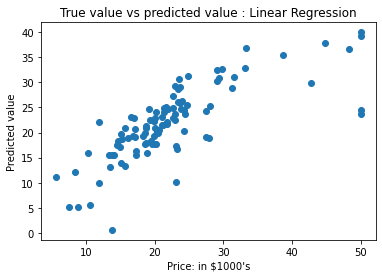

In [16]:
plt.scatter(ytest, y_pred)
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [17]:
# Results of Linear Regression.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)
print("Mean Square Error : ", mse)

Mean Square Error :  33.44897999767663
